Geo Data Science with Python,
Prof. Susanna Werth, VT Geosciences

---
# Exercise 7: Science Data - Midterm Take-Home Exam

### Content & Grading

You will receive the following points for this exercise:

- **A.1**: *50 P* <a href='#pd'> Pandas </a>
- **B**: *20 P* <a href='#bd'> Batch Download </a>
- **C**: *20 P* <a href='#nc'> NetCDF4   </a>

Total: 
- 90 points 
- **up to 15 extra credit points for reasonaby commenting your code** 

---
### Important considerations for the exam
- This is a take home exam. The due date will be announced on Canvas (about two weeks time).
- You can work in a team of up to 2 people on this exam.
- **If you work in a team, please indicate names of all collaborators above. And make a statement on individual contributions.** (Provide detail, who coded which part, and/or which parts you worked on together, and/or who wrote which part of the summary, etc.)!
- This is an open book exam. You can use any literature or internet resources. We encourage you to search for helpful built-in functions or functions of the Python standard libraries (e.g. math) on the Python documentation pages (https://docs.python.org/3/) or open source tutorials.
- If you use external references for your code solutions, please document this with your answers and/or in comments throughout the script file.
---

### Name and Collaborator
Add your name and the name of any collaborator in the code cell below.

In [1]:
Name = 'Ntambila Daud'
Collaborators = ['None']

<div class="alert alert-warning">

**Grades:** 

Total points: **58**/90 
    
- Part A (50P)
    - A1: -/20
    - A2: -/24
    - A3: 6/6
- Part B: 20/20
- Part C: 20/20
- ExtCrd: 15/15


Signed: Susanna Werth
    
    
</div>


<div class="alert alert-warning">

**Additional Grading Notes:** 

Some more comments might be provided below for answers without full points. If there are no comments, your answer is correct.
        

    


    
    
</div>



---
---
<a id='pd'></a>
# A. Pandas: Analyze Population Predictions 

### Overview

Code that reads UN population prediction data from file into a Pandas data frame and  anlyze the data, to answer given questions. The results of the data analysis should be summarized in a markdown cell.


### Data set

We will analyze future prediction of annual total population for different countries and regions around the world stored in the file **WPP2019_INTHOUSAND.txt**. The file is stored in the folder **./data** of the homework repository (**geosf22_material**).

The data were retrieved from the UN website https://population.un.org/wpp/Download/Standard/Population/.

- We are using the medium variant predictions for "Total Population - Both Sexes" for the years 2020 to 2100.
- The data are stored in the comma-separated text file WPP2019_INTHOUSANDS.txt
- Population numbers are given in unit of thousand, hence, a population of 1 in the file stands for 1000 people.

The file contains one header line: 
```txt
Region-subregion-country-or-area, 2022, 2023, ..., 2010
```

All following lines/rows contain population estimates for countries/region for the years 2020-2100. The first entry in each line indicates name of the country/region and all following entries contain the population number for this region/country and for the year (corresponding to the column indicated in the file header). 

For example the second entry indicates population estimate of 11891 (Eleventhousand-and-eighthundredninetyone) for the year 2020. 
```txt
Burundi, 11 891,   12 255, ..., 50 904
```

Note that the populuation numbers are stored in a way, that there is a space between the third and the fourth digit. Make sure to correctly read the numbers, before analyzing the data.


---
### A.1 Write functions for importing this dataset

Add your code in the following code cell, to:

- Import neccessary modules or functions.

- Write a function `readUNpopData` that reads the dataset from the file `WPP2019_INTHOUSANDS.txt` into a pandas data frame and returns that data frame at the end of the function run.

- Write a function `selectCountry` that requests user input at the beginning of the program that requests a country of interest to be analyzed later on.

- Add a docstring to all functions.

- Add comments throughout your code to increase readability.

Note: put the code for this tasks in the code cell below, then move on to the next task.

In [2]:
# ADD YOUR CODE - B.1

# importing packages to be used
import numpy as np
import pandas as pd
import math as ma

def readUNpopData(path,filetype,out):
    """
    Function is used to read a text file and returns the header-line as a list and data as a list of lists.
    The header and data are read independently as lists.

    Parameters/input
    ----------------
    path: <string>
        The path to the file without the filetype.
    filetype: <string>
        The file type, enter either 'txt' or 'csv'.
    ret: <string>
        out takes either 'header' or 'data' returns either the list for the header or data .

    Returns/output
    --------------
    header: <list>
        List of the header line.
    data: <list>
        List of lists for the data line.
    
     References:
     https://www.geeksforgeeks.org/how-to-read-text-file-into-list-in-python
     https://realpython.com/read-write-files-python
     https://www.geeksforgeeks.org/reading-writing-text-files-python
     https://stackoverflow.com/questions/61404473/create-a-list-of-lists-from-reading-a-text-file
     https://www.geeksforgeeks.org/calculate-the-average-variance-and-standard-deviation-in-python-using-numpy
    """
    path2 = path+'.'+filetype #saves the file name
    # except error handling when opening a data-file
    try:
        rd = open(path2,'r') # opening the file
        if out == 'header':
            print("file opened, now writing header to a list ...")
        elif out =='data':
            print("file opened, now writing data to a list of lists ...")
    except IOError:
        print("Error: can\'t find data file!")
    header2 = rd.readline() # header information saved as a variables
    header = header2.split(",") # separates the list into a list using the comma
    header[-1] = header[-1].replace('\n','') # removes the trailing \n in the header
    data2 = rd.readlines() # read other variable and saves it as a list of lists
    data = [sep.split(",") for sep in data2] # separates the list into a list using the comma
    # The for-loop for the entire data
    for i in range(len(data)):
        [i][-1] = data[i][-1].replace('\n','') # deletes the trailing \n in the header
        data[i][1:]=[x.replace(' ','') for x in data[i][1:]]
        data[i][1:]=[(int(x)*1000) for x in data[i][1:]]
    rd.close() # closes the file
    # conditional to returns header and data
    if out == 'header': 
        return header
    elif out =='data':
        return data
header = readUNpopData('../../../TeachingMaterial/data/WPP2019_INTHOUSAND','txt','header') 
data = readUNpopData('../../../TeachingMaterial/data/WPP2019_INTHOUSAND','txt','data') 
print(header) 

file opened, now writing header to a list ...
file opened, now writing data to a list of lists ...
['Region-subregion-country-or-area', '2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030', '2031', '2032', '2033', '2034', '2035', '2036', '2037', '2038', '2039', '2040', '2041', '2042', '2043', '2044', '2045', '2046', '2047', '2048', '2049', '2050', '2051', '2052', '2053', '2054', '2055', '2056', '2057', '2058', '2059', '2060', '2061', '2062', '2063', '2064', '2065', '2066', '2067', '2068', '2069', '2070', '2071', '2072', '2073', '2074', '2075', '2076', '2077', '2078', '2079', '2080', '2081', '2082', '2083', '2084', '2085', '2086', '2087', '2088', '2089', '2090', '2091', '2092', '2093', '2094', '2095', '2096', '2097', '2098', '2099', '2100']


---
### A.2 Data Analysis

In the code cell below, first use the functions above to actually import the data, and request one country/region name from user input.

Then write code to answer the following questions:

1. What was the estimated total world population in 2020?

2. What is the predicted total world population in 2050 and 2100?

3. What is the population increase of the total world population from now (2020) to 2050 and 2100 (in percentage)?

4. Which three countries are expected to contain the largest population in 10 years.

5. For the country/region name received from the user input request, retrieve a subset of the pandas data frame and return the population numbers for 2020, 2050 and 2100 for this country/region.

6. What is the current population and expected population increase in percentage by 2100 for USA, China, India, Nigeria, Egypt, Brazil, Australia, France, Turkey ? (Code this analysis as a loop over a list of these countries, instead of copying-pasting your code for each country).

7. Which country is expected to grow the fastest until 2100 (in percentage, relative to their population in 2020).

8. What is the mean and standard deviation for percentage growth rates for all countries (worldwide) from today until 2100? 


In [7]:
# %load PopuAnalysis.py
""" This python script consists of different functions to read a World population data file and computes different statistical infererences. Description of each function is given in the docstring. This work was not possible without consulting several sources, websites and references, thus any similarites of my work with another person's work may be both of us have consulted the same references by coincidence. The references for each function is proved in the docstring .
    References:
    https://www.geeksforgeeks.org/how-to-read-text-file-into-list-in-python/
    https://stackoverflow.com/questions/61404473/create-a-list-of-lists-from-reading-a-text-file: accessed on 11/26/2022
    https://www.geeksforgeeks.org/calculate-the-average-variance-and-standard-deviation-in-python-using-numpy
    https://stackabuse.com/calculating-variance-and-standard-deviation-in-python/
    https://realpython.com/python-min-and-max/#:~:text=Use%20Python's%20min()%20and,()%20with%20strings%20and%20dictionaries
    https://stackoverflow.com/questions/16579919/how-do-i-write-a-compare-function
    https://bobbyhadz.com/blog/python-calculate-percentage
"""

# importing packages to be used
import pandas as pd
import numpy as np  
import math as ma

# defining  the functions needed for Population Data analysis

def readUNpopData(path,filetype,out):
    """
    Function is used to read a text file and returns the header-line as a list and data as a list of lists.
    The header and data are read independently as lists.

    Parameters/input
    ----------------
    path: <string>
        The path to the file without the filetype.
    filetype: <string>
        The file type, enter either 'txt' or 'csv'. Note that the current functions can only read txt files.
    ret: <string>
        out takes either 'header' or 'data' returns either the list for the header or data .

    Returns/output
    --------------
    header: <list>
        List of the header line.
    data: <list>
        List of lists for the data line.
    """
    path2 = path+'.'+filetype   #saves the file name
    #  except error handling when opening a data-file
    try:
        rd = open(path2,'r') # opening the file
        if out == 'header':
            print("file exists")
        elif out =='data':
            print("file opened ready to use")
    except IOError:
        print("Error: can\'t find data file!")
    header2 = rd.readline()         # header information saved as a variables
    header = header2.split(",")    # separates the list into a list using the comma
    header[-1] = header[-1].replace('\n','') # removes the trailing \n in the header
    data2 = rd.readlines()                   # read other variable and saves it as a list of lists
    data = [sep.split(",") for sep in data2]  # separates the list into a list using the comma
    # The for-loop for the entire data
    for i in range(len(data)):
        [i][-1] = data[i][-1].replace('\n','') # deletes the trailing \n in the header
        data[i][1:]=[x.replace(' ','') for x in data[i][1:]]
        data[i][1:]=[(int(x)*1000) for x in data[i][1:]]
    rd.close() # closes the file
    # conditional to returns header and data
    if out == 'header': 
        return header
    elif out =='data':
        return data
    
# defining a function for maximum numbers in a list, let call it mymax
def mymax(x):
    """
    Function to find out the maximum number in a list of numbers.
    
    Parameters/input
    ----------------
    x: <list>
        List of numbers. 

    Returns/output
    --------------
    maxim: <numerical>
        A single number for the maximum number in the list of numbers.
    """
    maxim = x[0]   # maximum value in the first index in the list 
    for i in range(len(x)):
        if x[i] > maxim: # condition for the maximum operations
            maxim = x[i]
    return maxim  # returns the maxim number from the list 

def mymax3(x,y1):
    """
    Function used to find out the next two (2nd and 3rd) largest maximum numbers in a list
    
    Parameters/input
    ----------------
    x: <list>
        List of numbers. 
    y1: <numerical>
        single integer number of 2 or 3 for 2nd largest or 3rd largest number respectively.
        
    Returns/output
    --------------
    max2: <numerical>
        A single number for the 2nd largest number in the list of numbers.
    max3: <numerical>
        A single number for the 3rd largest number in the list of numbers. 
    """
    max1 = mymax(x) # rfinds the first maximum using mymax function
    x.remove(max1) # deletes the largest
    max2 = mymax(x) # finds the 2nd largest maximum
    x.remove(max2) # deletes the second largest
    max3 = mymax(x) # finds the 3rd largest maximum
    if y1 == 2:
        return max2 
    elif y1 == 3:
        return max3 
    else:
        print("Please enter either 2 or 3 as y1 for the 2nd or 3rd largest number") # this take care if the input for y1 is only 2 and 3
        
#defining a function to compute sum or total of numbers in a list, let call it mysum
def mysum(x):
    """
    Function used to compute the total sum of numbers passed.
   
    Parameters/input
    ----------------
    x: <numerical>
        A single number or list of numbers. 

    Returns/output
    --------------
    outsum: <numerical>
        A single number for the sum of the numbers.
    """
    outsum = 0 # initialize the sum with zero
    if type(x) == int or type(x) == float: # for one value, returns the same as the sum 
        outsum = x 
    else:
        # for-loop when a list of numbers given it sums up them 
        for i in range(len(x)):
            outsum = outsum + x[i]
    return outsum # returns the sum

# defining a function to compute the mean, let call it mymean
def mymean(x):
    """
    Function to compute the mean of numbers/lists:
    mean = sum(x)/len(x)
    The function make use of mysum function.

    Parameters/input
    ----------------
    x: <list>
        List of numbers. 

    Returns/output
    --------------
    outmean: <numerical>
        A single number for the mean of the numbers.
    """
    outmean = (mysum(x))/len(x)
    return outmean

# defining a function to compute the standard deviation, let call it mystd
def mystd(x):
    """
    Function to compute standard deviation of numbers/lists:
    It take advantages of mysum and mymean functions.

    Parameters/input
    ----------------
    x: <list>
        List of numbers. 

    Returns/output
    --------------
    outstd: <numerical>
        A single value for the standard deviation of numbers/lists.
    """
    square_diff = []     # set an empty square difference  
    for i in range(len(x)):  # for-loop fir the entire lists
        square_diff.append((x[i]-(mymean(x)))**2)    # appends each computed value to the square difference
    outstd = ((1/(len(x)-1))*mysum(square_diff))**(1/2)  # this uses mystd function
    return outstd

# defining a function to compute the percentage, let call it mypercentage      
def mypercentage(initial,final):
    """
    Function to computes the percentage change based on: percent_change = ((final/last - initial/first)/initial/first)*100
    The inputs are the initial/first and final/last number.

    Parameters/input
    ----------------
    initial: <list> or <numerical>
        The initial/starting list of numbers or single numeric value. 
    final: <list> or <numerical>
        The final list of numbers or single numeric value. 
        
    Returns/output
    --------------
    outper: <numerical>
        A single number for the percent change in %.
    """
    outper = (((mysum(final))-(mysum(initial)))/(mysum(initial)))*100 # calculates the percentage change
    return outper

# defining a function that compares the values, let call it mycompare
def mycompare(x,y):
    """
    Function used to compare the value in the first variable x equals the second variable y.

    Parameters/input
    ----------------
    x: <string>
        The value to be compared to another. 
    y: <list> or <string>
        The list or string to which it is being compared. 
        
    Returns/output
    --------------
    True: <boolean>
        Returns true if the two strings are comparable or the input is contained in the list to which it is being compared.
    """
    if type(x) == str and x == y:
        return True
    elif type(y) == list:
        for i in range(len(y)):
            if x == y[i]:
                return True
            
# Main Program
def main():
    header = readUNpopData('../../../TeachingMaterial/data/WPP2019_INTHOUSAND','txt','header') # reads the header line
    data = readUNpopData('../../../TeachingMaterial/data/WPP2019_INTHOUSAND','txt','data') # reads the other data
    print(header) # displays header on the screen to aid the user select the country of interest
    # Selecting the country/region to be analyzed later
    countries_regions = ([x[header.index('Region-subregion-country-or-area')] for x in data]) # saves all the available countries in the file to a variable
    SelectCountry = '' # display an interface on the scren for the user input SelectCountry = ''
    
    counter  = 0 # counter to check for failed tries
    while mycompare(SelectCountry,countries_regions) != True: 
        if counter>=4:
            print("Pleas select one of these countries:\n{}\n" .format(countries_regions)) # When 4 attempts fail print all countries on screen
        SelectCountry = input("Select a country of your interest to be analyzed:\n") # accepts user input
        counter = counter + 1 # adds one to counter after each failed attempt


    #1. What was the estimated total world population in 2020?
    year ='2020'
    World_Population2020 = mysum([x[header.index(year)] for x in data]) # sums up the population for 2020 using a list 
    print("\n1.The estimated total world population for {} is {}.".format(year,World_Population2020)) #print 
    
#2. What is the predicted total world population in 2050 and 2100?
    year1 ='2050'
    year2 ='2100'
    World_Population2050 = mysum([x[header.index(year1)] for x in data]) # sums up the population for 2050 using a list comprehension
    World_Population2100 = mysum([x[header.index(year2)] for x in data]) # sums up the population for 2100 using a list comprehension
    print("\n2.The estimated total world population in {} and {} are {} and {} respectively.".format(year1, year2,    World_Population2050,World_Population2100)) #prints out the estimated total world population in 2050 and 2100
    
#3. What is the population increase of the total world population from now (2020) to 2050 and 2100 (in percentage)?  # The computation is based on the population calculated in qn1 and qn2 above
    startyear1 ='2020'
    endyear1 ='2050'
    endyear2 ='2100'
    percent_30yrs = mypercentage(World_Population2020,World_Population2050)
    percent_80yrs = mypercentage(World_Population2020,World_Population2100)
    print("\n3.The population increase from {} to {} is {}%.".format(startyear1, endyear1, round(percent_30yrs,2)))
    print("The population increase from {} to {} is {}%.".format(startyear1, endyear2, round(percent_80yrs,2)))

#4. Which three countries are expected to contain the largest population in 10 years.
# Assumption: Now current year is 2022, so 10 years means the year will be 2032

    year ='2032'
    largest1 = data[[ i[header.index(year)] for i in data ].index(mymax([ i[header.index(year)] for i in data ]))][0] # uses the function mymax to find out the maximum
    largest2 = data[[ i[header.index(year)] for i in data ].index(mymax3([ i[header.index(year)] for i in data ],2))][0] # uses the function mymax3 to find out the 2nd largest
    largest3 = data[[ i[header.index(year)] for i in data ].index(mymax3([ i[header.index(year)] for i in data ],3))][0] # uses the function mymax3 to find out the 3rd largest

    print("\n4.The three countries expected to contain the largest population in 10 years from 2022 are {}, {}, and {} respectively.".format(largest1, largest2, largest3)) #prints out the largest three countries
    
#5. Enter any country/region for the user input request,retrieve a subset of the pandas data frame and return the population numbers for 2020, 2050 and 2100 for this country/region.

    year1 = '2020'
    year2 = '2050'
    year3 = '2100'
    population_2020 = data[[i[header.index('Region-subregion-country-or-area')] for i in data].index(SelectCountry)][header.index(year1)] #returns the population for a particular country, with the user input in the years given above
    population_2050 = data[[i[header.index('Region-subregion-country-or-area')] for i in data].index(SelectCountry)][header.index(year2)]
    population_2100 = data[[i[header.index('Region-subregion-country-or-area')] for i in data].index(SelectCountry)][header.index(year3)]

    print("\n5.The population of {} for the years {}, {}, and {} are {}, {}, and {} repectively.".format(SelectCountry, year1, year2, year3, population_2020, population_2050, population_2100 ))
    
#6. What is the current population and expected population increase in percentage by 2100 for USA, China, India, Nigeria, Egypt, Brazil, Australia, France, Turkey ? (Code this analysis as a loop over a list of these countries, instead of copying-pasting your code for each country).

    countries_regions = ['United States of America', 'China', 'India', 'Nigeria', 'Egypt', 'Brazil', 'Australia', 'France', 'Turkey'] 
    for i in range(len(countries_regions)): 
        current_Population = data[[x[header.index('Region-subregion-country-or-area')] for x in data].index(countries_regions[i])][header.index('2022')] #returns the current population of each country
        population_increase = mypercentage(current_Population,data[[x[header.index('Region-subregion-country-or-area')] for x in data].index(countries_regions[i])][header.index('2100')]) #returns the population increase
        print("\n6.The current population of {} in 2022 is {} and the expected population increase by 2100 is {}%.".format(countries_regions[i],current_Population, round(population_increase,2)))
        
#7. Which country is expected to grow the fastest until 2100 (in percentage, relative to their population in 2020).
    countries_regions = ([x[header.index('Region-subregion-country-or-area')] for x in data])
    population_increase = [] # initializing by assigning zero value
    for i in range(len(countries_regions)):
        population_increase.append(mypercentage(data[[x[header.index('Region-subregion-country-or-area')] for x in data].index(countries_regions[i])][header.index('2020')],
                                    data[[x[header.index('Region-subregion-country-or-area')] for x in data].index(countries_regions[i])][header.index('2100')]))
    countries_regions[population_increase.index(mymax(population_increase))] # the country expected to grow the fastest is the country with the highest population increase, here the function mypercentage is used
    print("\n7.The country expected to grow the fastest from 2020 until 2100 is {} at a percentage rate of {}%.".format(countries_regions[population_increase.index(mymax(population_increase))],round(population_increase[population_increase.index(mymax(population_increase))],2)))
    
#8. What is the mean and standard deviation for percentage growth rates for all countries (worldwide)from today until 2100?

    countries_regions = ([x[header.index('Region-subregion-country-or-area')] for x in data])
    population_increase = []  # initializing by assigning zero value
    for i in range(len(countries_regions)):
        population_increase.append(mypercentage(data[[j[header.index('Region-subregion-country-or-area')] for j in data].index(countries_regions[i])][header.index('2022')],
                                    data[[j[header.index('Region-subregion-country-or-area')] for j in data].index(countries_regions[i])][header.index('2100')])) # computes the percentage growth for each country
    meanAll = mymean(population_increase) # uses mymean to compute the mean
    stdAll = mystd(population_increase) # uses mystd deviation to calculate the standard deviation
    print("\n8.The mean and standard deviation for the percentage growth rates for all counties (worldwide) are {}% and {}% respectively.".format(round(meanAll,2),round(stdAll,2)))
    
if __name__ == "__main__":main() # This line causes main() function to be executed if this module is executed without an import

file exists
file opened ready to use
['Region-subregion-country-or-area', '2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030', '2031', '2032', '2033', '2034', '2035', '2036', '2037', '2038', '2039', '2040', '2041', '2042', '2043', '2044', '2045', '2046', '2047', '2048', '2049', '2050', '2051', '2052', '2053', '2054', '2055', '2056', '2057', '2058', '2059', '2060', '2061', '2062', '2063', '2064', '2065', '2066', '2067', '2068', '2069', '2070', '2071', '2072', '2073', '2074', '2075', '2076', '2077', '2078', '2079', '2080', '2081', '2082', '2083', '2084', '2085', '2086', '2087', '2088', '2089', '2090', '2091', '2092', '2093', '2094', '2095', '2096', '2097', '2098', '2099', '2100']


Select a country of your interest to be analyzed:
 China



1.The estimated total world population for 2020 is 7794803000.

2.The estimated total world population in 2050 and 2100 are 9735031000 and 10875389000 respectively.

3.The population increase from 2020 to 2050 is 24.89%.
The population increase from 2020 to 2100 is 39.52%.

4.The three countries expected to contain the largest population in 10 years from 2022 are India, China, and United States of America respectively.

5.The population of China for the years 2020, 2050, and 2100 are 1439324000, 1402405000, and 1064993000 repectively.

6.The current population of United States of America in 2022 is 334805000 and the expected population increase by 2100 is 29.58%.

6.The current population of China in 2022 is 1448471000 and the expected population increase by 2100 is -26.47%.

6.The current population of India in 2022 is 1406632000 and the expected population increase by 2100 is 2.87%.

6.The current population of Nigeria in 2022 is 216747000 and the expected population increase by 210

<div class="alert alert-warning">

**Additional Grading Notes:** 

Your results are all correct, but I am wondering about the code that you submitted. This is not the task you were given (but rather the one from last year). Did you submit your own code? I woul like to have a statement from you explaining your submission. Please get in touch to meet.
    
    
</div>



---
### A.3 Summary

In the markdown cell below, provide a reasonable summery for all the data analysis questions.

### ---

**ADD YOUR ANSWERS FOR A.3 IN THIS MARKDOWN CELL !!!**

### ---
The data analysis show that, the World population is increasing progressively in which the developed countries such as India, China and USA are expected to have the largest population. However, some of the developing countries such as Nigeria and Egypt their population are growing faster with Niger whose population is growing fastest than all countries


<div class="alert alert-warning">

**Additional Grading Notes:** 

(3/6P): Overall I am missing a complete summary of all requested numbers including results for question 6. I know you have the answers above, but in this task you were specifically asked to summarize everything in a markdown cell. 
    
    
</div>



---
<a id='bd'></a>
# B. Batch Download

### Overview
Often it is necessary to download multiple file with the same name, except for a running number or date. For example imagine to download a time series of global maps, where each sample in time is stored in a separate file. If you have do download daily data for a year, that would already make 365 files. In this case it would be best to do a batch download, hence, write a loop, that automatically generates all neded file names and downloads them one by one.

Here we will perform an example batch download of ~10 files.

### Data
Source: http://test.opendap.org/opendap/hyrax/data/ff/

This server provides multiple test files named `testN.dat`, with N running from 0 to 11. But file #5 and #6 are missing.

### Task: 

1) Write code to batch download all the test files in a loop from 0-11 (for all files) and from the website provided above, store them in a separate folder, e.g., `./out`. First, write the batch download only, then expand your code  with the next task.
2) Include a missing-file error handling, for missing files in the batch, without assuming you know, which files are missing. For that, a code example is provided below, it makes use of the following features:
    - function raise_for_status(): returns an HTTPError object if an error has occurred during the download process, e.g., if the file does not exist.
    - try/except: these statements are an example for an exception-handling. The except-sequence will be executed if the try-sequence raises any error, otherwise the except-sequence is skipped. This is not a loop and a try/except sequence alone will be performed only once.
    - then combine the try/except error handling with the batch download, to theck for the HTTPError for every download
    

In [9]:
# Code example for download error handling
import requests


fname = 'tes5.dat'
url = 'http://test.opendap.org/opendap/hyrax/data/ff/' + fname
outpath = './out/' + fname

try:
    r = requests.get(url)
    open(outpath, "wb").write(r.content)
    r.raise_for_status()
    print(fname)
except: # this will be executed if the sequence above raises an error
    print('A download error occured for file' + fname)

A download error occured for filetes5.dat


In [9]:

### YOUR CODE HERE
# Code example for download error handling
import requests
for i in range(0,12): 
    fname = 'test'+str(i)+'.dat'
    url = 'http://test.opendap.org/opendap/hyrax/data/ff/' + fname
    outpath = './out/' + fname

    try:
        r = requests.get(url)
        open(outpath, "wb").write(r.content)
        r.raise_for_status()
        print(fname)
    except: # this will be executed if the sequence above raises an error
        print('A download error occured for file' + fname)

test0.dat
test1.dat
test2.dat
test3.dat
test4.dat
A download error occured for filetest5.dat
A download error occured for filetest6.dat
test7.dat
test8.dat
test9.dat
test10.dat
test11.dat


---
<a id='nc'></a>
# C. NetCDF4

### Overview
Download and read a netCDF file, calculate a map statistic and plot the result.

### Tasks

Download the netCDF file `tos_O1_2001-2002.nc` from the server https://www.unidata.ucar.edu/software/netcdf/examples/tos_O1_2001-2002.nc. Then read the data from the file and calculate the maximum sea surface temperature during the year 2001 for each gridpoint. Then print the resulting map. For guidance and to receive full points, follow these next steps:

* Import the package `Dataset` from the module netCDF4 (1 point)
* Read the netcdf dataset from the file `tos_O1_2001-2002.nc` and save the content to the variable `data` (1 point)
* Print out the information of the data set to get an overview
* Assign the data content to the variable `lat`, `lon`, `time`, `tos`. Consider to select the correct object from the masked arrays, if needed (extract the data object). (2 points)
* Close the netCDF dataset/file (1 point)
* Convert the 1D lat/lon arrays to a meshgrid arrays and save them to the variables `lat_grid` and `lon_grid` (2 points)
* Converting missing values in '`tos` data to `np.nan` (convert to Celsius or leave at Kelvin, as you prefer) (1 point)
* Use vectorized code with the function `np.amax()` (allows to set an axis) to retrieve the maximum sea surface temperature during the year 2001 for each data pixel and save the results in a new map `tos_max2001` (6 points)
* Make a simple plot the new map `tos_max` with labeled coordinate axes and a colorbar with the colormap `'viridis'`. No further labeling needed (1 point)

In [10]:

### YOUR CODE HERE
import wget
# downloading the file tos_O1_2001-2002.nc
filename = 'tos_O1_2001-2002.nc'  # defining the filename
url = 'https://www.unidata.ucar.edu/software/netcdf/examples/' + filename  # defining the url
response = wget.download(url, filename)  # downloading the file using wget

100% [........................................................] 2949152 / 2949152

In [11]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt

from netCDF4 import Dataset   # importing Dataset from the module netCDF4
# reads the netcdf dataset and save the content to the variable data
data = Dataset('../../../TeachingMaterial/data/tos_O1_2001-2002.nc') 

print(data) # print out the information of the data set to get an overview

# Assign the data content to the variable lat, lon, time, tos
lat=data.variables['lat'][:].data   # saves latitudes
lon=data.variables['lon'][:].data   # saves longitudes
tos=data.variables['tos'][:].data   # saves tos variables
time=data.variables['time'][:].data # saves tos variables
tos_mask = data.variables['tos'][:].mask
fillvalue = data.variables['tos']._FillValue # assigns variable for missing value to a variable
tos_temp_unit = data.variables['tos'].units
data.close()  # closing the netCDF dataset/file
lon_grid,lat_grid = np.meshgrid(lon,lat) # converts the 1D lon/lat arrays to a meshgrid arrays
tos[tos==fillvalue] = np.nan  # converts missing values in tos data to np.nan

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: IPSL  model output prepared for IPCC Fourth Assessment SRES A2 experiment
    institution: IPSL (Institut Pierre Simon Laplace, Paris, France)
    source: IPSL-CM4_v1 (2003) : atmosphere : LMDZ (IPSL-CM4_IPCC, 96x71x19) ; ocean ORCA2 (ipsl_cm4_v1_8, 2x2L31); sea ice LIM (ipsl_cm4_v
    contact: Sebastien Denvil, sebastien.denvil@ipsl.jussieu.fr
    project_id: IPCC Fourth Assessment
    table_id: Table O1 (13 November 2004)
    experiment_id: SRES A2 experiment
    realization: 1
    cmor_version: 0.96
    Conventions: CF-1.0
    history: YYYY/MM/JJ: data generated; YYYY/MM/JJ+1 data transformed  At 16:37:23 on 01/11/2005, CMOR rewrote data to comply with CF standards and IPCC Fourth Assessment requirements
    references: Dufresne et al, Journal of Climate, 2015, vol XX, p 136
    comment: Test drive
    dimensions(sizes): lon(180), lat(170), time(24), bnds(2)
    variables(dime

In [12]:
# checking for the unit
print(tos_temp_unit)

K


In [13]:
length_2001 = len(time[time<=365])  # time for the year 2001
tos_max2001 =np.zeros((len(lat),len(lon))) # forms a 2 by 2 array matrix for the max value

for n in range(len(lat)):
    for m in range(len(lon)):
        tos_max2001[n][m] = np.nanmax(tos[:length_2001,n,m])

/var/folders/4l/slcw7w591kx1h7s207jh0y8h0000gp/T/ipykernel_62020/3653676898.py:6: RuntimeWarning: All-NaN slice encountered
  tos_max2001[n][m] = np.nanmax(tos[:length_2001,n,m])


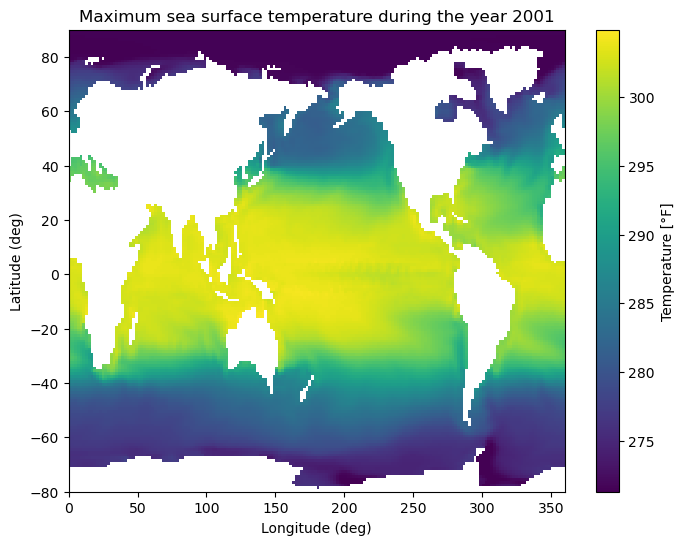

In [14]:
# plotting data into map
fig = plt.figure(figsize=(8, 6))  # defining size of the map
plt.pcolormesh(lon_grid,lat_grid,tos_max2001, shading='auto',cmap='viridis') 
plt.xlabel('Longitude (deg)')          # x-axis label
plt.ylabel('Latitude (deg)')           # y-axis label
plt.title('Maximum sea surface temperature during the year 2001')   # title
cbar = plt.colorbar()
cbar.set_label('Temperature [\N{DEGREE SIGN}F]')  